**ABOUT THE PROJECT**

Since the bank has an ever-growing client base, it needs to expand the base of borrowers to put in more credit business and attain more profit from interest on loans. So, the bank wants to shift the customers based on debt to customers with personal loans. The department wants a model that will help them identify the potential customers who have a higher probability of purchasing a loan, also at the same time, reduce the cost of campaigns that were devised earlier. 

The dataset given has an entry of 5000 customers. 

The objective of our model should be to predict the probability of a liability customer to purchase a personal loan. 


STEP 1: IMPORTING LIBRARIES AND DATASET

In [1]:
#These codes are for importing the required libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Copy of Bank_Personal_Loan_Modelling.xlsx to Copy of Bank_Personal_Loan_Modelling.xlsx


In [4]:
df = pd.read_excel('Copy of Bank_Personal_Loan_Modelling.xlsx')

ATTRIBUTES OF THE DATA

The dataset given has a number of attributes. Certain attributes are excluded here.
1. Age: Customer's age in completed years
2. Experience: years of professional experience
3. Income: Annual income of the customer
4. ZIP Code: Home Address ZIP code
5. Family: Family size of the customer
6. CCAvg: Average spending on credit cards per month
7. Education: Level of Education: 1-Undergraduate, 2-Graduate, 3-Advanced/Pofessional
8. Mortgage: Value of house mortgage if any.
9. Personal Loan: Did this customer accept the personal loan offered in the last
campaign?
10. Securities Account: Does the customer have a securities account with the bank?
11. CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
12. Online: Does the customer use internet banking facilities?
13. Credit card: Does the customer use a credit card issued by the bank?

In [5]:
#Display the top 10 rows
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
#Display the last 10 rows
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


In the above 2 steps, we just checked if we have uploaded the entire dataset correctly, so that we can continue forward with our project. 

In [7]:
#Display data type of each column
#Display non-null rows for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
#Display the summary statistics of the dataset which includes mean, standard deviation, quartiles, etc. 
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
#Display the null values if any in each column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

STEP 2: CLEANING THE DATA

While creating machine learning models, it is necessary to eliminate unnecessary columns of data that does not give any signal. These unnecessary data are referred to as noise. Here some of the columns, for example, ID column that contribute to noise are eliminated from the dataset.  Certain columns in the data set also are seen to have faulty data. For example, negative values in the experience column. We can replace those values or entirely eliminate them if they have some amount of correlation with any other columns. Here, experience has high correlation with the age column, hence can be eliminated.  

In [10]:
experience = df['Experience']
age = df['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

This shows the correlation between Experience and Age is 0.99. They are highly correlated and hence instead of imputing values and replacing the negative values in experience column, we can just eliminate the column. So ID and experience column can be dropped out from the dataset.  

In [11]:
df = df.drop(['ID', 'Experience'], axis=1)
df.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


Now we see that the ID and Experience column have been eliminated from the dataset as they are irrelevant. We have obtained our modified dataset. 


STEP 3: Exploratory Data Analysis(EDA)

To study the data distribution in each attribute and target variable. Some of them are:

1. Number of unique in each column?
2. Number of people with zero mortgage?
3. Number of people with zero credit card spending per month?
4. Value counts of all categorical columns.
5. Univariate and Bivariate analysis

In [12]:
#Display number of unique in each column.
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Here, we see that Zip code is a categorical variable. It has 467 values which is a lot. Zip code is a type of nominal data which does not have an order for the values. If it is a nominal variable, then  we need to create dummy variables using one hot encoding. But, by doing so we would be creating 467 new columns which are closely related to one another. Hence, it is better to drop or eliminate the Zip code column. 

In [13]:
 df = df.drop('ZIP Code', axis = 1)

In [14]:
df

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [15]:
#Display number of people with zero mortgage
(df.Mortgage == 0).sum()

3462

In [16]:
#Display number of people with zero credit card spending per month
(df.CCAvg == 0).sum()

106

Next, we are asked to show value counts of all categorical columns.

In [17]:
#Display Value counts of all categorical columns.
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [18]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [19]:
df.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [20]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [21]:
df['CCAvg'].value_counts()

0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
8.200000      1
5.333333      1
4.666667      1
8.900000      1
9.300000      1
Name: CCAvg, Length: 108, dtype: int64

In [22]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [23]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [24]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

Next, we need to do Univariate and Multivariate analysis of the dataset. 

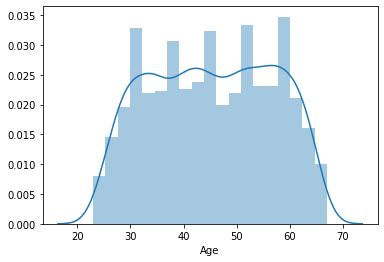

In [25]:
#Univariate Analysis
sns.distplot(df.Age)

From the plot, we get an idea that the Age has a symmetrical distribution. 

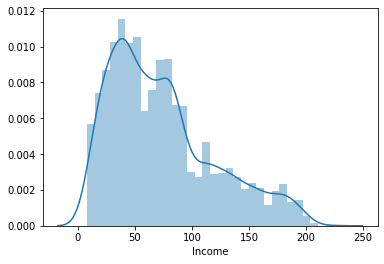

In [27]:
sns.distplot(df.Income)

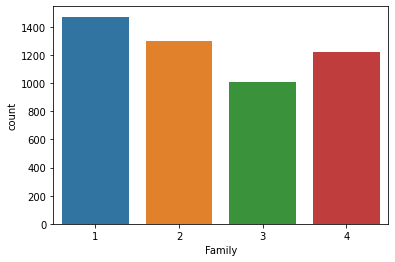

In [28]:
sns.countplot(df.Family)

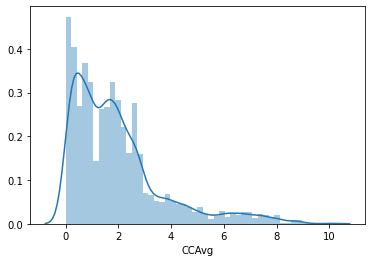

In [29]:
sns.distplot(df.CCAvg)

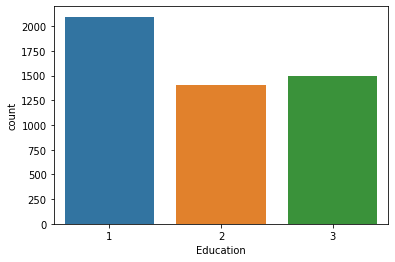

In [30]:
sns.countplot(df.Education)

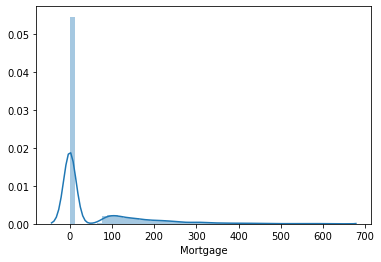

In [31]:
sns.distplot(df.Mortgage)

The two plots below gives an idea about the use of internet banking facilities by the customers. 

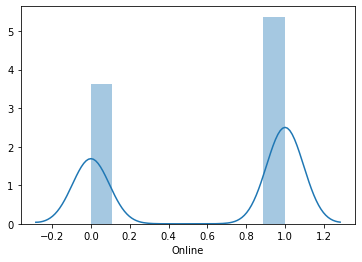

In [32]:
sns.distplot(df.Online)

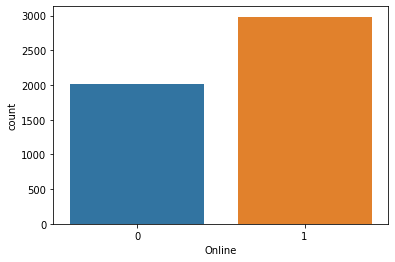

In [33]:
sns.countplot(df.Online)

Here, the two plots below shows the use of Credit cards by the customers. 

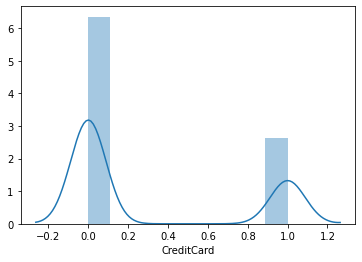

In [34]:
sns.distplot(df.CreditCard)

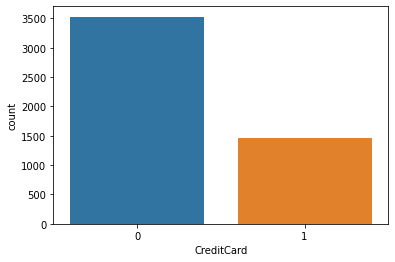

In [35]:
sns.countplot(df.CreditCard)

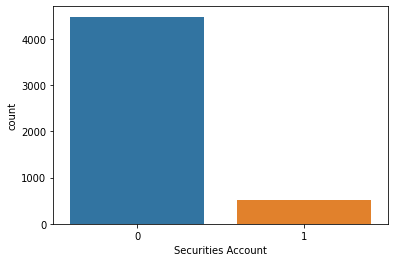

In [36]:
sns.countplot(df['Securities Account'])

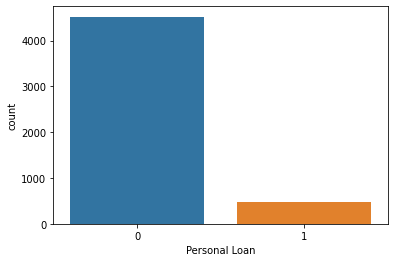

In [37]:
sns.countplot(df['Personal Loan'])

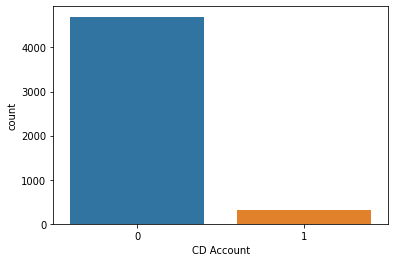

In [38]:
sns.countplot(df['CD Account'])

MULTIVARIATE ANALYSIS

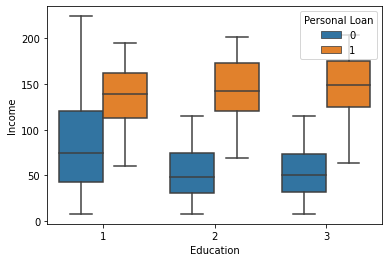

In [39]:
#Multivariate Analysis
sns.boxplot(x = 'Education', y = 'Income', hue = 'Personal Loan', data = df )

From the plot shown above, we can see that customers with more income are given personal loans based on education levels. 

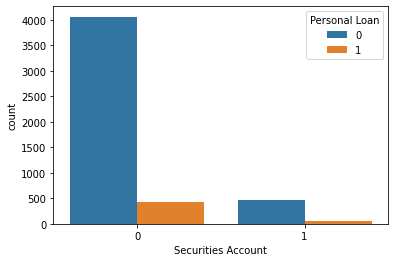

In [40]:
sns.countplot(x= 'Securities Account', hue = 'Personal Loan', data = df)

The plot above shows that customers having securities account do not have personal loans. 

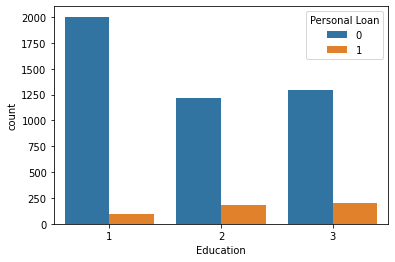

In [41]:
sns.countplot(x='Education', hue = 'Personal Loan', data = df)

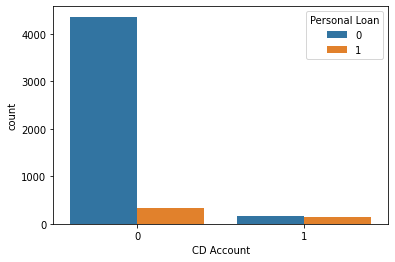

In [42]:
sns.countplot(x= 'CD Account', hue = 'Personal Loan', data = df)

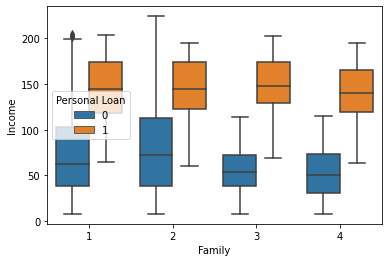

In [43]:
sns.boxplot(x = 'Family', y = 'Income', hue ='Personal Loan', data = df)

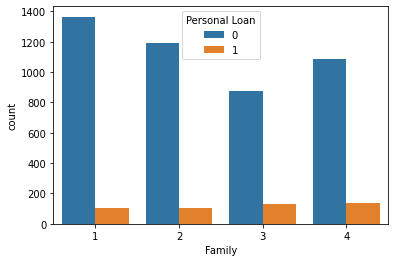

In [44]:
sns.countplot(x= 'Family', hue = 'Personal Loan', data = df)

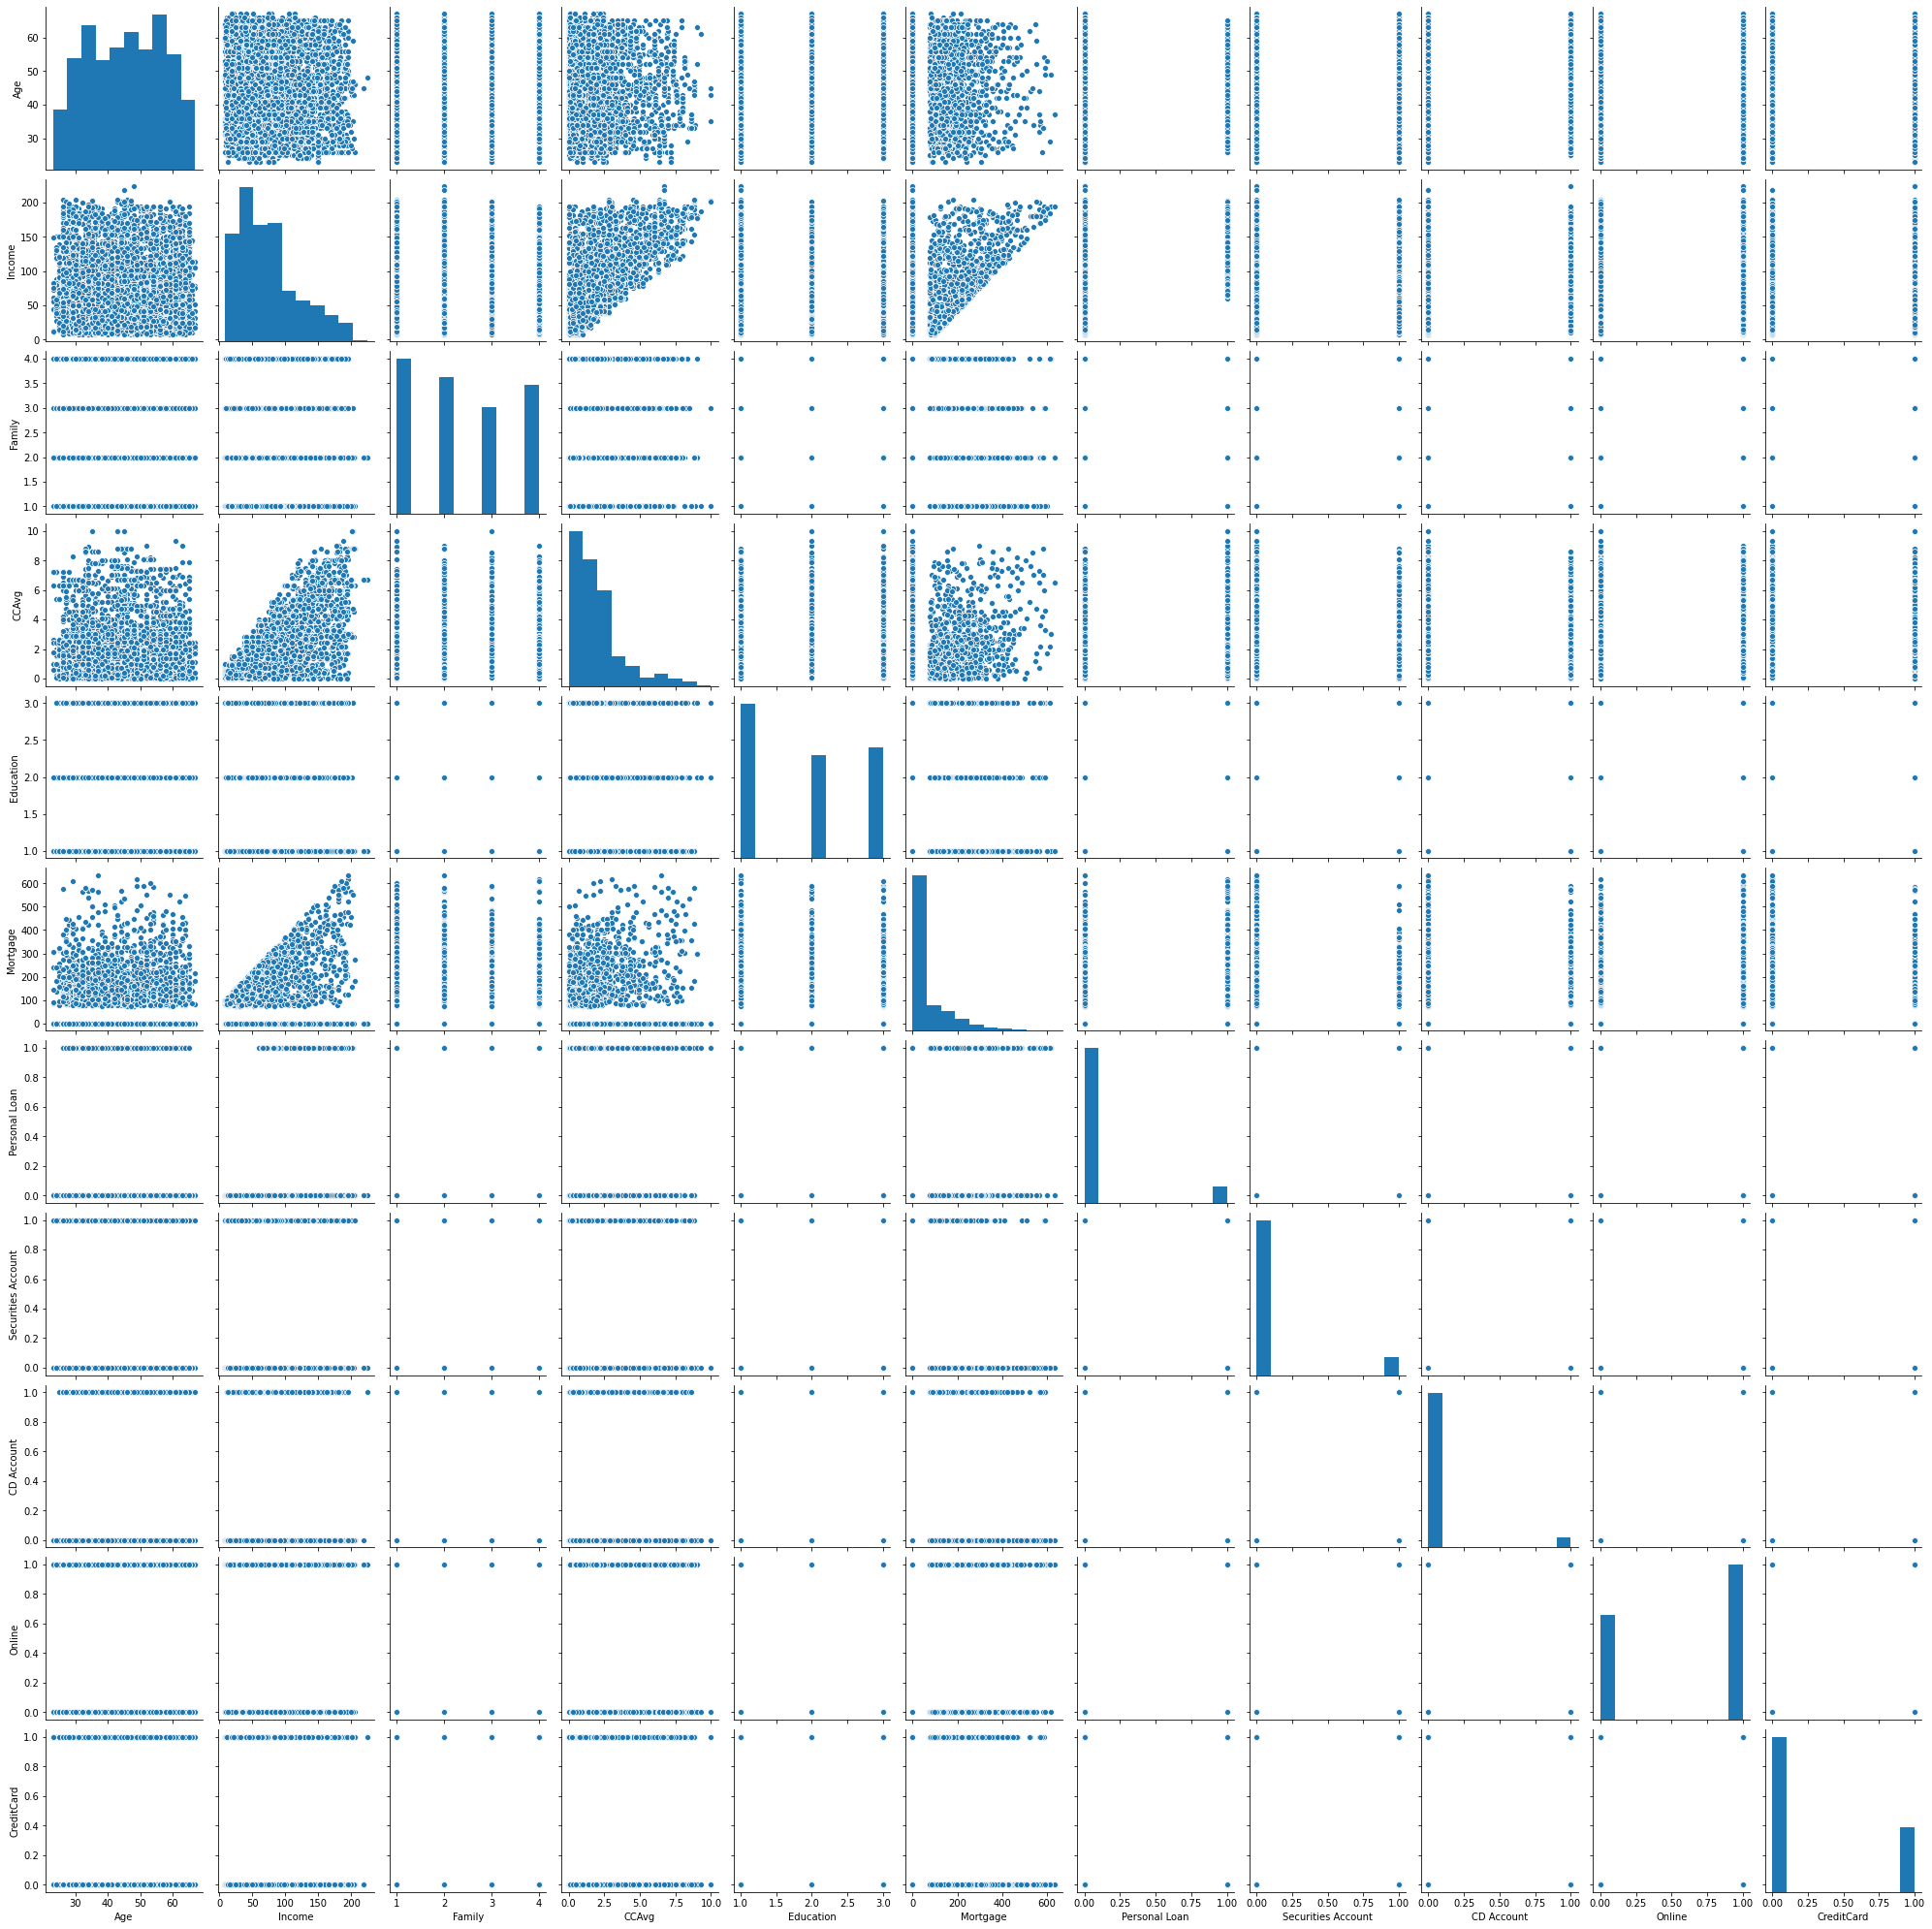

In [45]:
sns.pairplot(df)

Pairplot plots one variable with every other variable. It is as shown above. 

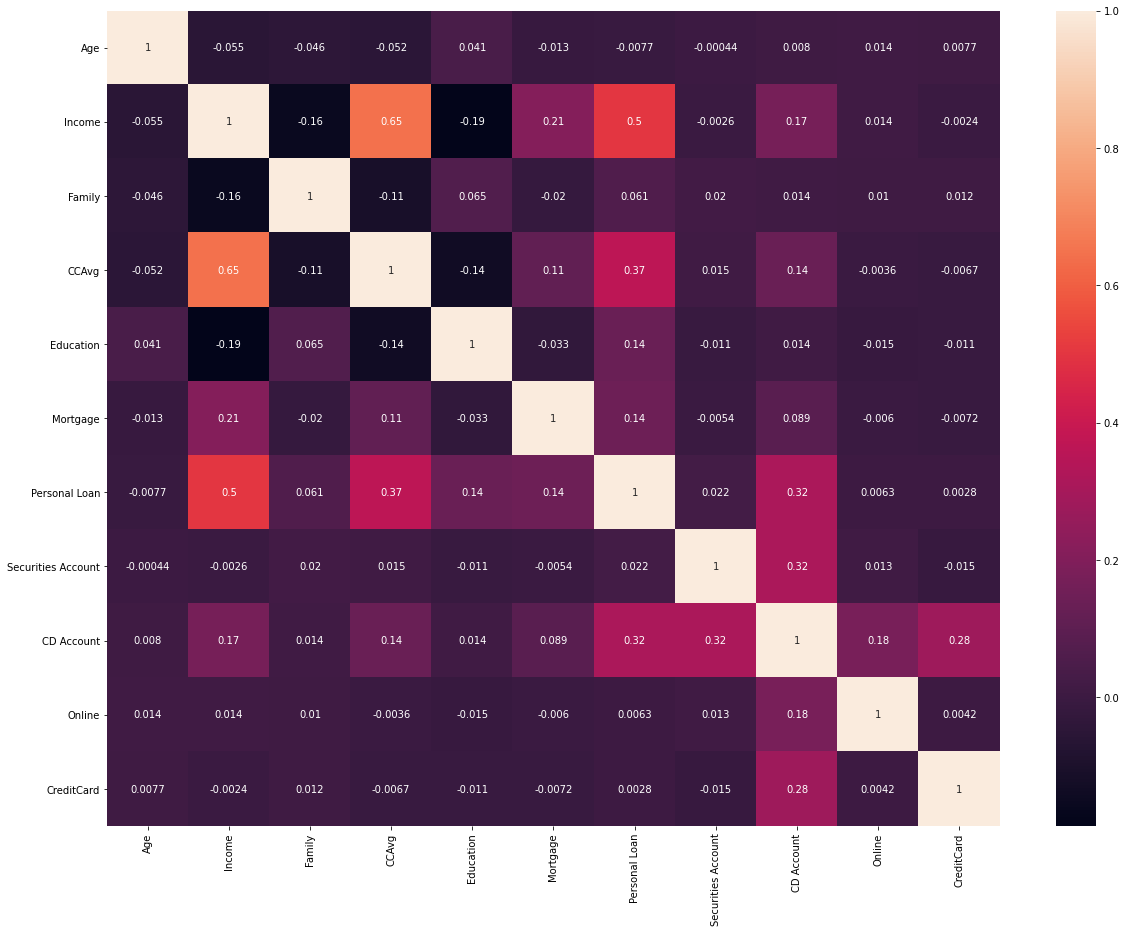

In [87]:
fig,ax = plt.subplots(figsize = (20,15))
sns.heatmap(df.corr(), annot = True);

From this, we can see that there is maximum correlation between  Credit Card average and Income which is 0.65. Furthermore, there is 0.5 correlation between Income and Personal Loan. Other varaibles do not that high amount of correlation. Most variables are independent in nature. 

STEP 4: TRANSFORMATIONS OF FEATURE VARIABLES

Some variables are not normally distributed as they are skewed. So we need to transform those feature variables.








In [47]:
data_X = df[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
data_Y = df['Personal Loan'].values

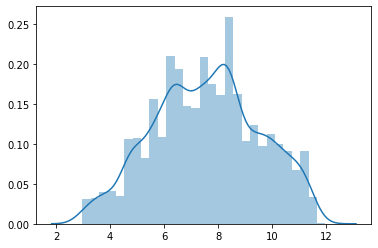

In [88]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(data_X["Income"].values.reshape(-1,1))
data = pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(data);


Now, the graph shown above, for income is normally distributed. 

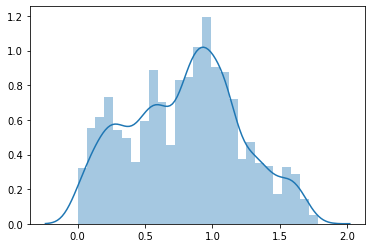

In [89]:
pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
data = pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(data);

We get a almost normally distributed graph for Credit card average. 

In the case of Mortgage, there is discontinuity in the data and therefore we cannot use Power transformation here. So we create bins. Bin is another form of data pre-processing.  

In [50]:
data_X["Mortgage_Int"]= pd.cut(data_X["Mortgage"],
                               bins= [0,100,200,300,400,500,600,700],
                               labels= [0,1,2,3,4,5,6],
                               include_lowest=True)
data_X.drop("Mortgage", axis= 1, inplace=True)

In [51]:
data_X.head()

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,Mortgage_Int
0,25,49,4,1.6,0,0,1,1,0,0
1,45,34,3,1.5,0,0,1,1,0,0
2,39,11,1,1.0,0,0,1,0,0,0
3,35,100,1,2.7,0,0,2,0,0,0
4,35,45,4,1.0,0,1,2,0,0,0


In [52]:
data_X.tail()

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,Mortgage_Int
4995,29,40,1,1.9,1,0,3,0,0,0
4996,30,15,4,0.4,1,0,1,0,0,0
4997,63,24,2,0.3,0,0,3,0,0,0
4998,65,49,3,0.5,1,0,2,0,0,0
4999,28,83,3,0.8,1,1,1,0,0,0


STEP 5: SPLIT THE DATASET INTO TRAINING AND TEST DATA

In [53]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size= 0.3, stratify = data_Y, random_state= 0)

In [54]:
train_X.head()

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,Mortgage_Int
3789,51,24,3,0.4,1,1,1,0,0,0
758,64,35,1,1.5,0,0,2,1,0,0
2868,52,31,4,1.8,1,1,1,0,0,0
2550,32,20,1,0.5,1,0,3,0,0,1
2150,62,54,1,0.8,0,1,1,1,0,0


In [55]:
test_X.head()

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,Mortgage_Int
9,34,180,1,8.9,0,0,3,0,0,0
461,55,81,2,3.7,0,0,1,1,0,0
3700,48,128,1,5.7,0,0,1,1,0,0
1559,59,102,4,3.0,1,0,2,0,0,1
4558,44,82,2,0.4,1,1,1,0,0,0


STEP 6: TRAINING THE MODEL

LOGISTIC REGRESSION MODEL

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [57]:
model.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy for training the model

In [58]:
model.score(train_X, train_Y)

0.9494285714285714

Accuracy for testing the model

In [59]:
model.score(test_X, test_Y)

0.9446666666666667

In [60]:
expected = test_Y
predicted = model.predict(test_X)

In [61]:
from sklearn import metrics


In [62]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.59      0.67       144

    accuracy                           0.94      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



In [63]:
from sklearn.metrics import confusion_matrix
print(metrics.confusion_matrix(expected, predicted))

[[1332   24]
 [  59   85]]


The accuracy for testing the data using Logistic Regression model is 93.6%. 

RANDOM FOREST

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [65]:
model.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy for training the model

In [66]:
model.score(train_X, train_Y)

1.0

Accuracy for testing the model

In [67]:
model.score(test_X, test_Y)

0.9893333333333333

In [68]:
expected= test_Y
predicted = model.predict(test_X)

In [69]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.90      0.94       144

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [70]:
print(metrics.confusion_matrix(expected, predicted))

[[1354    2]
 [  14  130]]


The accuracy for testing the data using Random Forest model is obtained to be 98.67% which proves it be a better model than logistic regression model. 

DECISION TREES

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.



In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [72]:
model.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
import graphviz
from sklearn import tree
dot_df = tree.export_graphviz(model, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(dot_df)

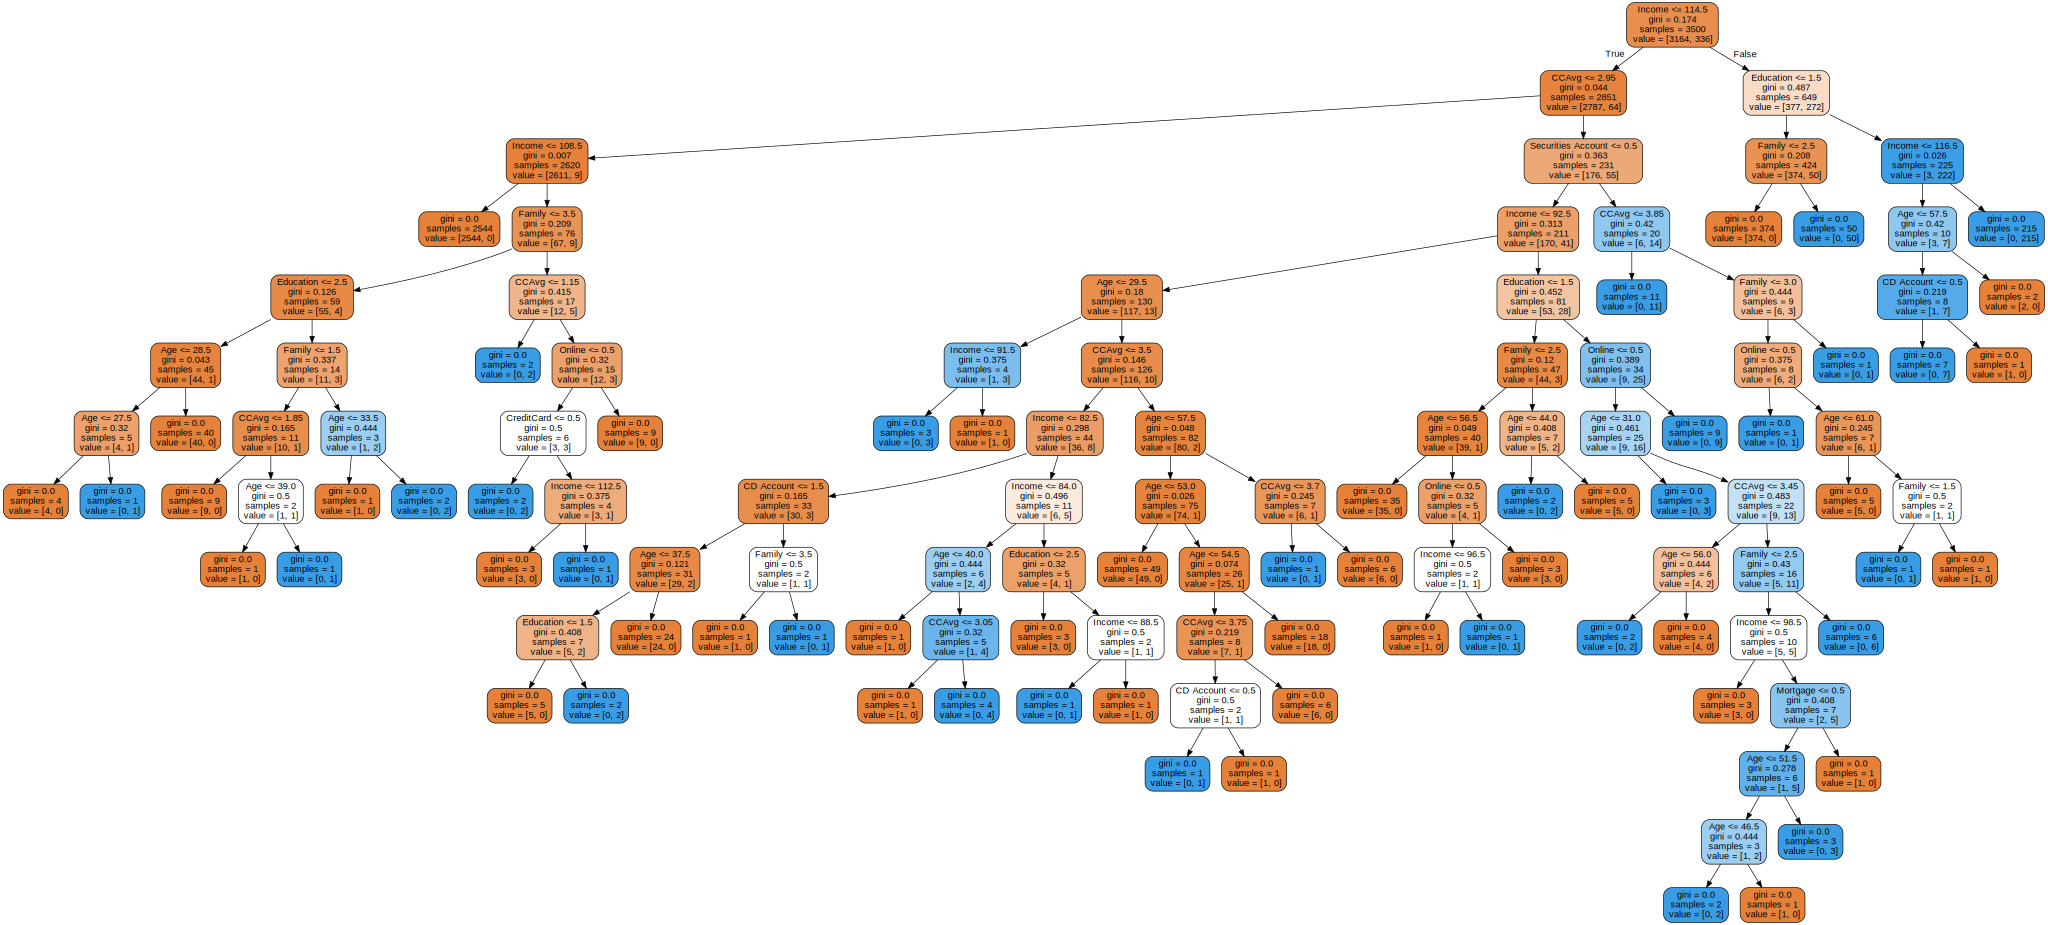

In [74]:
graph

Accuracy for training the model

In [75]:
model.score(train_X, train_Y)

1.0

Accuracy for testing the model

In [76]:
model.score(test_X, test_Y)

0.982

In [77]:
expected= test_Y
predicted = model.predict(test_X)

In [78]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [79]:
print(metrics.confusion_matrix(expected, predicted))

[[1343   13]
 [  14  130]]


The accuracy for testing the data using Decision Tree model is found to be 98.2% which is better than logistic regression model but slightly behind Random Forest model.  

SUPPORT VECTOR MACHINE (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

In [80]:
from sklearn.svm import SVC
model= SVC()

In [81]:
model.fit(train_X, train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy for training the model. 

In [82]:
model.score(train_X, train_Y)

0.9048571428571428

Accuracy for testing the model

In [83]:
model.score(test_X, test_Y)

0.9046666666666666

In [84]:
expected = test_Y
predicted = model.predict(test_X)

In [85]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       1.00      0.01      0.01       144

    accuracy                           0.90      1500
   macro avg       0.95      0.50      0.48      1500
weighted avg       0.91      0.90      0.86      1500



In [86]:
print(metrics.confusion_matrix(expected, predicted))

[[1356    0]
 [ 143    1]]


The accuracy for testing the data using Support Vector Machine model is found to be 91%. 

**CONCLUSION**

The project had a main objective to build a model to predict the likelihood of a liability customer buying personal loans. There were many steps to be done before building the models during the course of the project. The steps that were done are as follows:

1. We imported the dataset and required libraries. The dataset obtained was checked and also data cleaning was done by dropping irrelevant data columns such as Experience which had a high amount of correlation with Age. 
2. Other variables like the ID and ZIP Code was also dropped as it did not contribute to the signal. 
3. Univariate and multivariate analysis was also done for certain data columns. Some of them had to be normalised and transformed. CCAvg and Income were normalised but Mortgage was a discontinuous variable, so it could not be transformed by Power Transformation. Hence, we bin the Mortgage. 
4.Then we split the data into training data and test data and we create different models.

The comparison of various models that have been built during the project have been given below. 

**LOGISTIC REGRESSION MODEL**

The accuracy of this model is 93.6%. 

The classification report of the model is shown below. 

    precision    recall  f1-score   support

           0       0.96      0.97      0.97      1356
           1       0.70      0.59      0.64       144

    accuracy                           0.94      1500
    macro avg       0.83      0.78      0.80      1500
    weighted avg       0.93      0.94      0.93      1500


The confusion matrix for the model is given below. 

[[1320   36]
 [  59   85]]


 **RANDOM FOREST MODEL**

 The accuracy of this model is 98.67%. 

 The classification report for the model 

    precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.90      0.94       144

    accuracy                           0.99      1500
    macro avg       0.99      0.95      0.97      1500
    weighted avg       0.99      0.99      0.99      1500


The confusion matrix for the model

[[1354    2]
 [  15  129]]

 **DECISION TREE MODEL**

 The accuracy of the model is 98.2%. 

 The classification report for the model 

    precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.89      0.90       144

    accuracy                           0.98      1500
    macro avg       0.95      0.94      0.95      1500
    weighted avg       0.98      0.98      0.98      1500


The confusion matrix for the model

[[1345   11]
 [  16  128]]

**SUPPORT VECTOR MACHINE MODEL**

 The accuracy of the model is 91%. 

 The classification report for the model 

    precision    recall  f1-score   support

           0       0.91      1.00      0.95      1356
           1       0.71      0.10      0.18       144

    accuracy                           0.91      1500
    macro avg       0.81      0.55      0.57      1500
    weighted avg       0.89      0.91      0.88      1500

The confusion matrix for the model 

[[1350    6]
 [ 129   15]]

 From the comparison, we get an idea that the Random Forest Model has the highest accuracy amongst the four models that have been built. SVM is found to be a bad model as it can make wrong predictions. 
 Also, Random Forest Model can be considered the best model here as it has the highest accuracy and also least number of false negatives. 